In [103]:
!pip install xgboost

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv(r"C:\Users\ibrah\Downloads\dataset.csv")
dataset.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


In [106]:
dataset.shape

(4000, 8)

In [4]:
dataset.select_dtypes('number')

,Ingredients_Cost,Time_Taken,Price,Amount
0,28,6,49,10
1,65,2,93,9
2,96,5,128,8
3,155,3,198,6
4,20,2,32,5
...,...,...,...,...
3995,200,4,283,10
3996,152,7,202,1
3997,153,10,218,6
3998,207,4,280,5


In [7]:
dataset.select_dtypes('object')

,Sold_On,Size,Design_Complexity,Gender
0,Monday,large,complex,female
1,Saturday,medium,simple,female
2,Wednesday,large,simple,male
3,Tuesday,medium,simple,female
4,Saturday,large,simple,male
...,...,...,...,...
3995,Thursday,medium,simple,female
3996,Saturday,medium,complex,female
3997,Friday,small,complex,male
3998,Tuesday,small,simple,male


In [8]:
dataset.describe()

,Ingredients_Cost,Time_Taken,Price,Amount
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,111.552500,4.683000,154.680750,5.455000
std,57.863428,2.830285,76.282079,2.871591
min,10.000000,1.000000,14.000000,1.000000
25%,62.000000,2.750000,90.000000,3.000000
50%,113.000000,4.000000,154.000000,5.000000
75%,162.000000,6.000000,217.000000,8.000000
max,210.000000,11.000000,329.000000,10.000000


In [10]:
dataset.isna().sum()

Sold_On              0
Size                 0
Ingredients_Cost     0
Design_Complexity    0
Time_Taken           0
Price                0
Amount               0
Gender               0
dtype: int64

In [110]:
price_per_day = dataset.groupby(['Sold_On','Gender'])['Price'].sum()
price_per_day

Sold_On    Gender
Friday     female    41618
           male      48934
Monday     female    48225
           male      40275
Saturday   female    47258
           male      42125
Sunday     female    42946
           male      41998
Thursday   female    42548
           male      43940
Tuesday    female    44055
           male      43904
Wednesday  female    42961
           male      47936
Name: Price, dtype: int64

In [111]:
price_per_Gender = dataset.groupby(['Gender','Design_Complexity'])['Price'].sum()
price_per_Gender

Gender  Design_Complexity
female  complex              163794
        simple               145817
male    complex              159282
        simple               149830
Name: Price, dtype: int64

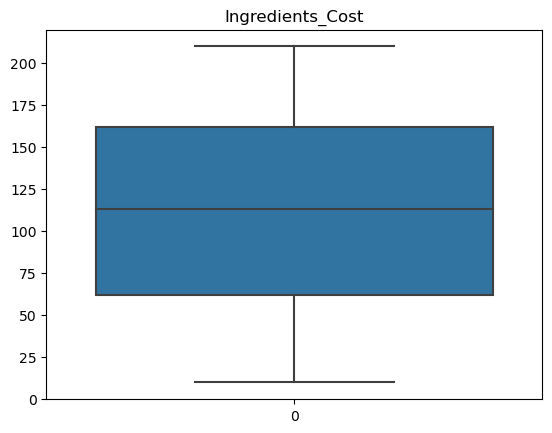

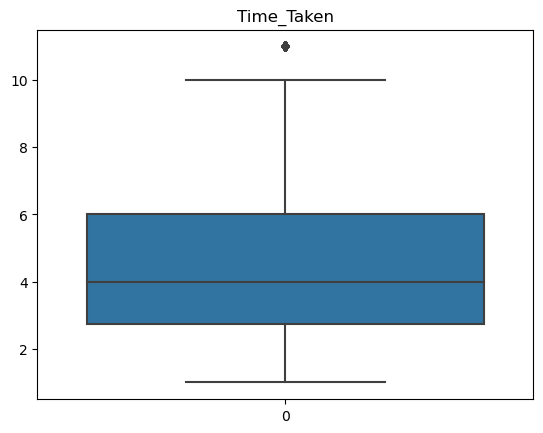

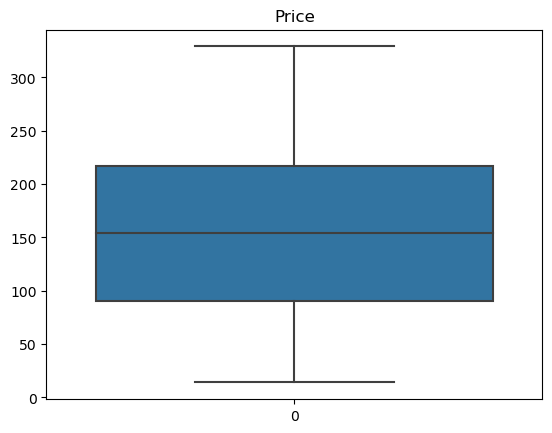

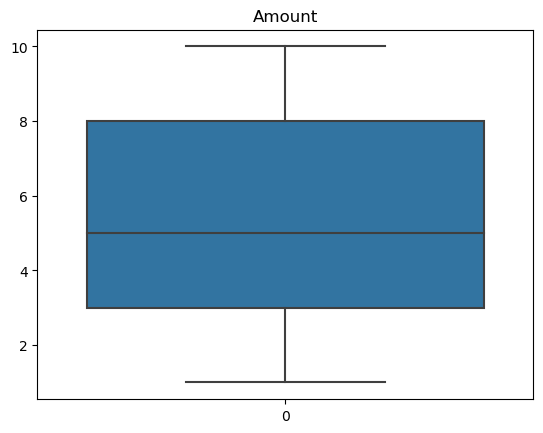

In [112]:
for col in dataset.columns:
    if dataset[col].dtype == 'int64':
        sns.boxplot(dataset[col])
        plt.title(col)
        plt.show()
        

# Dealing with Categorical Values
Label Encoded


In [18]:
# using label encoding

dataset_label_encoding = dataset.copy()
dataset_label_encoding = dataset_label_encoding.drop('Sold_On',axis=1)

In [115]:
dataset_label_encoding.dtypes

Sold_On              object
Size                 object
Ingredients_Cost      int64
Design_Complexity    object
Time_Taken            int64
Price                 int64
Amount                int64
Gender               object
dtype: object

In [19]:
object_cols = ['Size','Design_Complexity','Gender']

In [20]:
# befor label encoding we need to convert obj type tp cat type
dataset_label_encoding [object_cols]= dataset_label_encoding[object_cols].astype('category')

In [21]:
dataset_label_encoding.dtypes

Size                 category
Ingredients_Cost        int64
Design_Complexity    category
Time_Taken              int64
Price                   int64
Amount                  int64
Gender               category
dtype: object

In [22]:
# label encoding
for col in object_cols:
    dataset_label_encoding[col]=dataset_label_encoding[col].cat.codes

In [23]:
dataset_label_encoding.head()

,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,0,28,0,6,49,10,0
1,1,65,1,2,93,9,0
2,0,96,1,5,128,8,1
3,1,155,1,3,198,6,0
4,0,20,1,2,32,5,1


In [24]:
corr = dataset_label_encoding.corr()

THe heat map blow show that the correlation between ingredients_Cost and Price is strong possitave Correlation but in another hand it show there is a weak corr between Design_Complexity and time_taken this didn't make sense!!
By looking to the dataset will shall see why?
the gap between the time_taken value and price value is too big and the size was a categorical values after encodeing it also there is a big gap in values.
## So this data need to normalize

<Axes: >

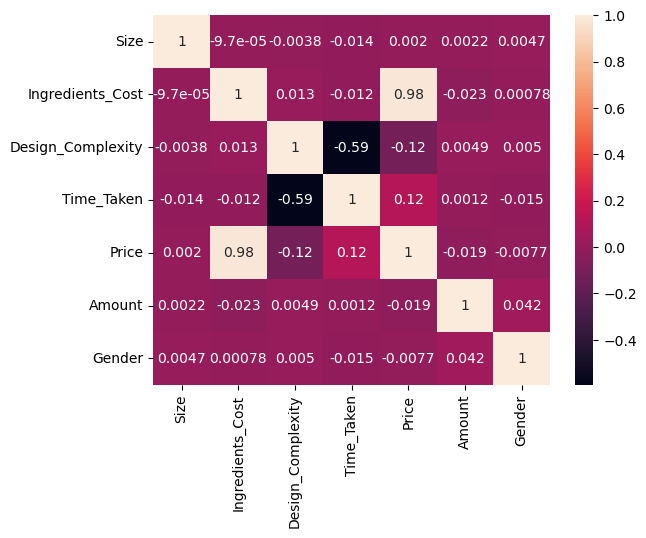

In [25]:
sns.heatmap(corr,annot=True)

In [57]:
# normalize each col value using min max normalization
def normalize (data):
     nor_data = {}
     for col in data.columns:
          max_value = data[col].max()
          min_value = data[col].min()
          col_values = []
          for x in data[col]:
               normalized_value = x-min_value / max_value - min_value
               col_values.append(normalized_value)
          nor_data[col] = col_values
     return nor_data

In [58]:
normalized_data = normalize(dataset_label_encoding)

In [59]:
normalized_data = pd.DataFrame(normalized_data)

In [60]:
normalized_data

,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,0.0,17.952381,0.0,4.909091,34.957447,8.9,0.0
1,1.0,54.952381,1.0,0.909091,78.957447,7.9,0.0
2,0.0,85.952381,1.0,3.909091,113.957447,6.9,1.0
3,1.0,144.952381,1.0,1.909091,183.957447,4.9,0.0
4,0.0,9.952381,1.0,0.909091,17.957447,3.9,1.0
...,...,...,...,...,...,...,...
3995,1.0,189.952381,1.0,2.909091,268.957447,8.9,0.0
3996,1.0,141.952381,0.0,5.909091,187.957447,-0.1,0.0
3997,2.0,142.952381,0.0,8.909091,203.957447,4.9,1.0
3998,2.0,196.952381,1.0,2.909091,265.957447,3.9,1.0


In [93]:
Y = normalized_data[['Price']]
X = normalized_data.drop('Price',axis=1)

In [94]:
X

,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Amount,Gender
0,0.0,17.952381,0.0,4.909091,8.9,0.0
1,1.0,54.952381,1.0,0.909091,7.9,0.0
2,0.0,85.952381,1.0,3.909091,6.9,1.0
3,1.0,144.952381,1.0,1.909091,4.9,0.0
4,0.0,9.952381,1.0,0.909091,3.9,1.0
...,...,...,...,...,...,...
3995,1.0,189.952381,1.0,2.909091,8.9,0.0
3996,1.0,141.952381,0.0,5.909091,-0.1,0.0
3997,2.0,142.952381,0.0,8.909091,4.9,1.0
3998,2.0,196.952381,1.0,2.909091,3.9,1.0


In [95]:
# spliting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)


In [96]:
# scale the data used to make the mean of the data 0 and STD 1
scaler_label = StandardScaler()
scaler_label.fit(x_train)

StandardScaler()

In [97]:
x_train = scaler_label.fit_transform(x_train)
x_test = scaler_label.fit_transform(x_test)

In [98]:
x_train.shape

(3600, 6)

In [99]:
# create a dict with models to be tested on the data
models = {'Linear Regresion': LinearRegression(),
        'SVR': SVR(),
        'RandomForestRegressor': RandomForestRegressor(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'XGBRegressor': XGBRegressor() }

In [101]:
accuracy = {}
for key,value in models.items():
    model = value
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    score = model.score(x_test,y_test)
    error = mean_squared_error(y_pred=prediction,y_true=y_test)
    accuracy[key] = [score,np.sqrt(error)]

c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [103]:
accuracy # Linear regresion and Random forest regressor is the best two model to deal with this data
#because the relation between the price and the strongest related feature ingrediants_cost is linear relation

{'Linear Regresion': [0.966644734961459, 13.429855627463498],
 'SVR': [0.9312323515660472, 19.2832944483619],
 'RandomForestRegressor': [0.9639617582987464, 13.959534708990525],
 'DecisionTreeRegressor': [0.9408551217356883, 17.88330226775804],
 'XGBRegressor': [0.9591452105125877, 14.863142259222517]}

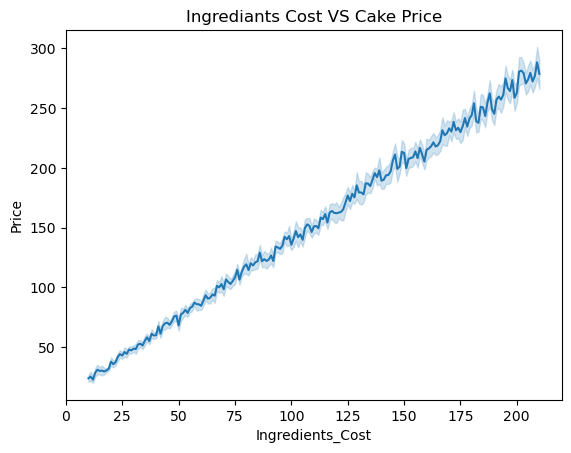

In [107]:
sns.lineplot(data=dataset,x='Ingredients_Cost',y='Price')
plt.title("Ingrediants Cost VS Cake Price")
plt.show()

## The following code is the same as the previous but using another way to encode the categorical data which is One_hot_encode

# Handeling Categorical Data 
one hot encoded

In [132]:
dataset_one_hot = dataset.copy()

In [133]:
dataset_one_hot

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male
...,...,...,...,...,...,...,...,...
3995,Thursday,medium,200,simple,4,283,10,female
3996,Saturday,medium,152,complex,7,202,1,female
3997,Friday,small,153,complex,10,218,6,male
3998,Tuesday,small,207,simple,4,280,5,male


In [134]:
dataset_one_hot[object_cols] = dataset_one_hot[object_cols].astype('category')
dataset_one_hot = dataset_one_hot.drop('Sold_On',axis=1)

In [135]:
dataset_one_hot

,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,large,28,complex,6,49,10,female
1,medium,65,simple,2,93,9,female
2,large,96,simple,5,128,8,male
3,medium,155,simple,3,198,6,female
4,large,20,simple,2,32,5,male
...,...,...,...,...,...,...,...
3995,medium,200,simple,4,283,10,female
3996,medium,152,complex,7,202,1,female
3997,small,153,complex,10,218,6,male
3998,small,207,simple,4,280,5,male


In [136]:
dataset_one_hot = pd.get_dummies(dataset_one_hot,dtype=int)

In [137]:
dataset_one_hot.dtypes

Ingredients_Cost             int64
Time_Taken                   int64
Price                        int64
Amount                       int64
Size_large                   int32
Size_medium                  int32
Size_small                   int32
Design_Complexity_complex    int32
Design_Complexity_simple     int32
Gender_female                int32
Gender_male                  int32
dtype: object

In [138]:
Y_hot = dataset_one_hot[['Price']]
X_hot = dataset_one_hot.drop('Price',axis=1)

In [139]:
x_train_hot,x_test_hot,y_train_hot,y_test_hot = train_test_split(X_hot,Y_hot,test_size=0.1)

In [140]:
scaler_hot = StandardScaler()
scaler_hot.fit(x_train_hot)

StandardScaler()

In [141]:
x_test_hot

,Ingredients_Cost,Time_Taken,Amount,Size_large,Size_medium,Size_small,Design_Complexity_complex,Design_Complexity_simple,Gender_female,Gender_male
889,52,1,4,0,1,0,0,1,0,1
2743,47,10,5,0,1,0,1,0,0,1
1731,55,2,4,0,1,0,0,1,0,1
1841,106,8,1,0,0,1,1,0,0,1
1815,34,5,10,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2522,98,5,8,0,1,0,0,1,1,0
2233,79,3,2,0,1,0,1,0,0,1
742,31,7,2,0,0,1,1,0,0,1
2359,72,3,8,0,0,1,0,1,0,1


In [142]:
x_test_hot_s = scaler_hot.fit_transform(x_test_hot)
x_train_hot_s = scaler_hot.fit_transform(x_train_hot)

In [143]:
accuracy_hot = {}
for key,value in models.items():
    model = value
    model.fit(x_train_hot_s,y_train_hot)
    prediction = model.predict(x_test_hot_s)
    score = model.score(x_test_hot_s,y_test_hot)
    error = mean_squared_error(y_pred=prediction,y_true=y_test_hot)
    accuracy_hot[key] = [score,np.sqrt(error)]

c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [144]:
accuracy_hot

{'Linear Regresion': [-3.97343919841518e+20, 1527152265688.5388],
 'SVR': [0.9266769156841028, 20.745285569231736],
 'RandomForestRegressor': [0.9730557147054196, 12.575706386703825],
 'DecisionTreeRegressor': [0.9527505470826898, 16.65319038502833],
 'XGBRegressor': [0.9453142600595892, 17.91579569726078]}

# Using label encoded and hot encoded in data both techqs showed that Linear Regression is the best model to predict the cake price 

In [145]:
model = LinearRegression()

In [146]:
x_train_hot_s.shape

(3600, 10)

In [147]:
model.fit(x_train,y_train)

LinearRegression()

In [148]:
model.score(x_test,y_test)

0.9760349946596973

In [149]:
import joblib

In [150]:
joblib.dump(model,'model_cake.h5')
joblib.dump(scaler_hot,'scaler_cake.h5')

['scaler_cake.h5']